## Preparing the data

In [ ]:
!pip install fastai==1.0.52
from fastai import *
from fastai.text import *

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
path = Path(os.getcwd())
path = path/'gdrive'/'My Drive'
news=path/'Thesis Data'/'full doc csv'
aa=path/'Thesis Data'/'Our dataset'
aa2=path/'Thesis Data'/'AA dataset'
wiki=path/'Thesis Data'/'wiki_data'/'Wiki'

In [0]:
bs=32

## Wiki ULM

Note that language models can use a lot of GPU, so you may need to decrease batchsize here.

In [0]:
# Language model data
data_lm = TextLMDataBunch.from_csv(wiki , 'wiki_lm.csv', bs=bs)
data_lm.save('wiki_word.pkl')

In [0]:
data_lm = load_data(wiki, 'wiki_word.pkl' ,bs=bs)

In [0]:
data_lm.show_batch()

idx,text
0,ব্ল্যাক স্যাম বলা হয় কারণ তিনি তার লম্বা চুল পিছনে নেওয়ার জন্য এক ধরনের xxunk পাউডার ও চুলের ব্যান্ড ব্যবহার করতেন । xxunk সবসময় তার লুট করা জাহাজের বন্দিদের ক্ষমা করে দিতেন এবং জাহাজের লোকদের কোন প্রকার ক্ষতি করতেন না । এই চরিত্রের কারণে তিনি প্রিন্স অফ পাইরেট খেতাব অর্জন করেন । তিনি নিজেকে xxunk সাথে তুলনা করতেন এবং তার ক্রুরা নিজেদেরকে xxunk লোক বলে পরিচয় দিত । xxunk ১৬৮৯
1,"বৃহত্তম অবদানকারী । 2008 সালের হিসাবে , মালদ্বীপের 89 টি রিসর্ট xxunk শয্যায় দেওয়া এবং বার্ষিক xxunk এরও বেশি পর্যটকদের হোস্ট করে । 1972 থেকে 2007 সাল পর্যন্ত xxunk সংখ্যা 2 থেকে xxunk এর মধ্যে বৃদ্ধি পেয়েছে । 2007 সাল নাগাদ , xxunk জন পর্যটক মালদ্বীপে গিয়েছিলেন । মালদ্বীপের xxunk ভিসার প্রি - আগমনের জন্য আবেদন করতে হবে না , তাদের দেশের উত্থান নির্বিশেষে , তাদের কাছে বৈধ পাসপোর্ট ,"
2,গেরিলা আক্রমণ করার দুঃসাহসী এক সিদ্ধান্ত নিলেন । এরপর তাঁর নির্দেশে মো . সদর উদ্দিন xxunk মুক্তিযোদ্ধারা দ্রুত তৈরি হলেন । তাঁদের কাছে অস্ত্র বলতে হালকা অস্ত্র ; স্টেনগান ও রাইফেল । আর কয়েকটি হ্যান্ড গ্রেনেড । xxunk সামান্য । তাই সম্বল করে তাঁরা বেরিয়ে পড়লেন পাকিস্তানি সেনাদের খোঁজে । তাঁরা সেনাদের মুখোমুখি হলেন xxunk কাছে xxunk । xxunk সদর উপজেলার অন্তর্গত । দলনেতার নির্দেশে মো . সদর উদ্দিন আহমেদ
3,"হিসেবে । তিনি একজন অবসরপ্রাপ্ত সেনাবাহিনীর কর্নেল যাঁর নেশা প্রকৃতির ছবি তোলা , পাখি দেখা এবং গাছ - xxunk সন্ধানে খুঁজে বেড়ানো । তিনি নিজেকে xxunk হিসেবে পরিচয় দিতে ভালবাসেন । পেশায় গোয়েন্দা নন কিন্তু ইচ্ছা এবং অনিচ্ছাকৃত ভাবে রহস্যে জড়িয়ে পড়লে তার সমাধান করেন । যেহেতু তিনি সেনাবাহিনী থেকে অবসরপ্রাপ্ত অফিসার , তাই দুর্গম এলাকায় যাওয়ার মতো সহিষ্ণু শরীর আর প্রশিক্ষণ দুই - ই তাঁর আছে । ফাদার xxunk"
4,"xxunk চরিত্রে অভিনয় করেন । ২০১৮ সালের আগস্টে ফারমিগা নিশ্চিত করেন তিনি আমেরিকান হরর xxunk ৮ম মৌসুমে অংশ নিবেন । \n xxbos xxunk বাংলাদেশের খাগড়াছড়ি জেলার অন্তর্গত দীঘিনালা উপজেলার একটি ইউনিয়ন । দীঘিনালা উপজেলার উত্তরাংশ জুড়ে xxunk ইউনিয়নের অবস্থান । এ ইউনিয়নের পূর্বে রাঙ্গামাটি জেলার বাঘাইছড়ি উপজেলার সাজেক ইউনিয়ন ; দক্ষিণে দীঘিনালা ইউনিয়ন ও বোয়ালখালী ইউনিয়ন ; পশ্চিমে পানছড়ি উপজেলার xxunk ইউনিয়ন , পানছড়ি ইউনিয়ন ও ভারতের ত্রিপুরা প্রদেশ"


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


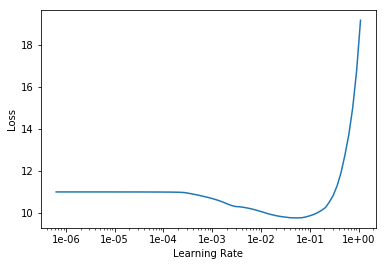

In [0]:
learn.recorder.plot()

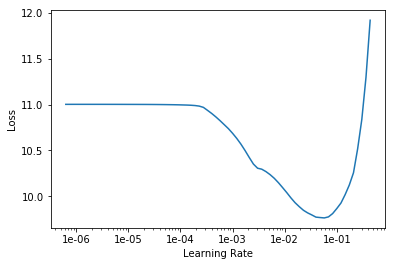

In [0]:
learn.recorder.plot(skip_end=10)

#### epochs

epoch,train_loss,valid_loss,accuracy,time
0,5.200973,5.077995,0.264524,40:27
1,5.063317,4.904387,0.276917,40:43
2,4.808316,4.691440,0.292538,40:37
3,4.674263,4.480223,0.310078,40:38
4,4.459049,4.398908,0.318343,40:36


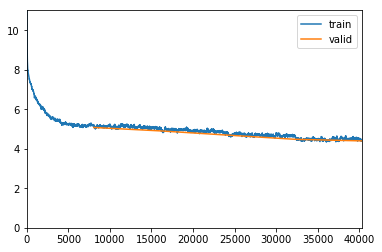

In [0]:
learn.fit_one_cycle(5, 1e-2)
learn.save('wiki_word_lm_1');

epoch,train_loss,valid_loss,accuracy,time
0,4.470980,4.408347,0.317289,40:21
1,4.468989,4.375013,0.320310,40:27


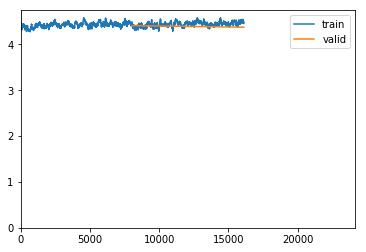

Buffered data was truncated after reaching the output size limit.

In [0]:
learn.load('wiki_word_lm_1');
learn.fit_one_cycle(3, 1e-3)
learn.save('wiki_word_lm_2');

In [0]:
learn.load('wiki_word_lm_2');
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_9'); #9th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.510958,4.354421,0.322548,1:16:46


In [0]:
learn.load('wiki_word_lm_9');
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_10'); #10th epoch

/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:327: UserWarning: Wasn't able to properly load the optimizer state again.
  except: warn("Wasn't able to properly load the optimizer state again.")


epoch,train_loss,valid_loss,accuracy,time
0,4.437127,4.346854,0.323429,1:17:22


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_11'); #11th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.473254,4.336812,0.324833,1:17:49


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_12'); #12th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.312455,4.326378,0.325653,1:17:26


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_13'); #13th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.354211,4.315218,0.326277,1:17:23


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_14'); #14th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.442514,4.308449,0.326951,1:17:10


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_15'); #15th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.296780,4.303234,0.327555,1:17:10


In [0]:
learn.load('wiki_word_lm_15');
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_16'); #16th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.360970,4.294533,0.327704,1:21:51


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_17'); #17th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.348758,4.290963,0.328784,1:21:56


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_18'); #18th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.363933,4.282438,0.329013,1:22:05


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_19'); #19th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.286972,4.277395,0.329322,1:21:59


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_20'); #20th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.289502,4.272470,0.330194,1:22:08


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_21'); #21th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.398139,4.264174,0.330265,1:21:59


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_22'); #22th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.289913,4.258613,0.330690,1:21:39


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_23'); #23th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.253526,4.252819,0.331508,1:21:39


In [0]:
learn.load('wiki_word_lm_23');
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_24'); #24th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.298167,4.249014,0.331971,40:15


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_25'); #25th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.309002,4.246167,0.332193,40:17


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_26'); #26th epoch

epoch,train_loss,valid_loss,accuracy,time
0,5.085125,4.967541,0.283053,1:18:13


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_27'); #27th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.841737,4.685205,0.301066,1:19:06


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_28'); #28th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.702053,4.555993,0.309813,1:19:26


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_29'); #29th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.698676,4.477737,0.315683,1:19:32


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_word_lm_30'); #30th epoch

epoch,train_loss,valid_loss,accuracy,time
0,4.550671,4.426266,0.319562,1:19:39


#### test

In [0]:
learn.load('wiki_word_lm_2');

In [0]:
TEXT = "তিন" #তিনি মারা গেছেন মাস তিনেক
N_WORDS = 100
N_SENTENCES = 3

In [0]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

তিন - সাত প্রজাতির নাগপুর , মেরিলেবোন এবং নিউজিল্যান্ড দ্বারা এদের পূর্ণাঙ্গ প্রজাতি হিসেবে গণ্য করা হয় । পশ্চিম আফ্রিকার বিভিন্ন অঞ্চলে এদের দেখা মেলে । অন্যান্য আফ্রিকান প্রজাতির মতো এদের দেখতে অনেকটা ছোট ছোট আকারের বাদামী রঙের । এদের মধ্যে অন্যতম হল- লেজ , পা , লেজ , পাতা , লেজ ও পায়ের পাতা । এদের পিঠ , মাথা ও পা , পায়ের পাতা , নিচের পাতা দুটি হালকা হলুদ রঙের হয় এবং এদের লেজের রঙ হলুদ - হলুদ রঙের হয় । এদের লেজ ও পা কালচে - কালো । এর দেহে ছিল সাদা ও গাঢ় সাদা । তাদের মাথায়
তিন বার বিখ্যাত ভারতীয় সনে দার্শনিক ও সাংবাদিক তথা সাহিত্যিক ও সাহিত্যিক মহলে জনপ্রিয় বাংলা রচনা । তিনি বাংলা , ফ্রেঞ্চ , হিন্দী এবং ইংরেজি ভাষায় প্রায় সব ভাষায় অনুবাদ করেছেন । তিনি বানানো ও অনুবাদ করেছেন এবং লি অথবা ভারতীয় বাংলা সাহিত্যে কাজ করেছেন । xxbos 
  xxbos ড্যানিয়েল মিশেল ( ) একজন মার্কিন তাত্ত্বিক রসায়নবিজ্ঞানী । তিনি ১৯৮৯ সালে পদার্থবিজ্ঞানে নোবেল পুরস্কার লাভ করেন । xxbos পল মার্কিন যুক্তরাষ্ট্রের লেখক ও বিষয়ক মিশন । 
  xxbos ইতিহাস সংযুক্ত আরব আমিরাতের বিহার ও পাকিস্তানের কিছু অংশে অবস্

## Utils

In [0]:
def testing(dts):
  df = pd.read_csv(dts) 
  text_array = df["text"].tolist()
  print(len(text_array))

  final_preds = []

  for text in text_array:
      preds = learn_cls.predict(text)
      final_preds.append(str(preds[0]))

  targets = df["label"].tolist()

  err=[]
  count =0;
  tst = len(text_array)

  for i in range(tst):
      if(targets[i]==final_preds[i]):
          count = count+1
      else:
  #         print(targets[i] + ", " + final_preds[i] + ';')
          err.append((targets[i],final_preds[i]))
  print("Accuracy: ")
  print(count/tst)
  print(err)
  return final_preds,targets

## BAAD6 dataset

In [0]:
aa = aa2

In [0]:
# Language model data AA
data_lm_AA = TextLMDataBunch.from_csv(aa, 'ulm_train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_lm_AA.save('bhai_AA_data_lm_wiki.pkl')

In [0]:
# Classifier model data AA
data_clas = TextClasDataBunch.from_csv(aa, 'ulm_train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_clas.save('bhai_AA_data_clas_wiki.pkl')

In [0]:
data_clas.show_batch()

text,target
"xxbos দেখিতে xxunk পর্বতমালা একটু xxunk ... xxunk ২০০৪ সালের অক্টোবরে লেখা । xxunk আগে একাধিকবার অনলাইনে প্রকাশিত । এই xxunk একাধিক কারণে আমার xxunk । প্রথমত , xxunk xxunk এক আসনে লেখা , মাঝখানে শুধু xxunk একটু । xxunk , এখন পর্যন্ত এটাই আমার xxunk xxunk ( xxunk দিক থেকে ) । xxunk , এবং xxunk গুরুত্বপূর্ণ যে xxunk , এমন একটা xxunk এ xxunk ধরে রাখা আছে ,",hm
"xxbos দেখিতে xxunk পর্বতমালা একটু xxunk ... xxunk ২০০৪ সালের অক্টোবরে লেখা । xxunk আগে একাধিকবার অনলাইনে প্রকাশিত । এই xxunk একাধিক কারণে আমার xxunk । প্রথমত , xxunk xxunk এক আসনে লেখা , মাঝখানে শুধু xxunk একটু । xxunk , এখন পর্যন্ত এটাই আমার xxunk xxunk ( xxunk দিক থেকে ) । xxunk , এবং xxunk গুরুত্বপূর্ণ যে xxunk , এমন একটা xxunk এ xxunk ধরে রাখা আছে ,",hm
"xxbos আবাহন ১ . "" উনি একজন xxunk ছিলেন । "" xxunk xxunk xxunk কোনো কমতি রইলো না । সোমা একটু শাসন করার চেষ্টা করলো স্বামীকে , "" নিজের xxunk কেউ xxunk বলে এভাবে ? "" শামীম বারান্দার কাঠের xxunk পা তুলে দিয়ে xxunk করে চায়ের কাপে xxunk দিয়ে বললো , "" এই শর্মা বলে । আর xxunk , উনি আমার আপন দাদা নন । বাবার চাচা । xxunk ।",hm
"xxbos গোয়েন্দা xxunk ও অজ্ঞান পার্টি রহস্য এক গোয়েন্দা xxunk চোখ গরম করে বললেন , "" এবারও কি xxunk মতো দুই xxunk কেস নিয়ে হাজির হলেন নাকি ? "" পুলিশের গোয়েন্দা বিভাগের xxunk দারোগা xxunk xxunk আধ হাত জিভ কেটে বললেন , "" আর লজ্জা দেবেন না স্যার ! এবার একদম পরীক্ষানিরীক্ষা করিয়ে তবে এসেছি । এই দেখুন আমাদের ফরেনসিক এক্সপার্ট কেমিক্যাল আলির রিপোর্ট । "" xxunk xxunk xxunk xxunk",hm
"xxbos গোয়েন্দা xxunk ও অজ্ঞান পার্টি রহস্য এক গোয়েন্দা xxunk চোখ গরম করে বললেন , "" এবারও কি xxunk মতো দুই xxunk কেস নিয়ে হাজির হলেন নাকি ? "" পুলিশের গোয়েন্দা বিভাগের xxunk দারোগা xxunk xxunk আধ হাত জিভ কেটে বললেন , "" আর লজ্জা দেবেন না স্যার ! এবার একদম পরীক্ষানিরীক্ষা করিয়ে তবে এসেছি । এই দেখুন আমাদের ফরেনসিক এক্সপার্ট কেমিক্যাল আলির রিপোর্ট । "" xxunk xxunk xxunk xxunk",hm


In [0]:
data_lm_AA.show_batch()

idx,text
0,xxunk সরকার প্রতিষ্ঠার দাবিতে আন্দোলন করে আসছে । সংগত কারণেই ১৮ xxunk জোটের অভিন্ন দাবি হিসেবে সেখানে xxunk স্লোগান - বক্তব্য কিংবা ব্যানার - xxunk তাই উল্লেখ থাকার কথা । সমাবেশে xxunk নেতাদের xxunk সবাই একই বক্তব্যকে প্রাধান্য xxunk xxunk করেছেন । কিন্তু xxunk ইসলামী ও ইসলামী xxunk কিছু নেতা - কর্মী সমাবেশে প্রকাশ্যে একাত্তরে মানবতাবিরোধী অপরাধীদের মুক্তি দাবি করেছেন । তাঁরা দাবি করেছেন বাংলাদেশের সাধারণ মানুষের কাঙ্ক্ষিত আন্তর্জাতিক অপরাধ
1,", xxunk জীবন xxunk ফলে জগতে এমন প্রভাব রেখে গেছেন যা আর কারও পক্ষে কখনও xxunk xxunk এবং xxunk না । তার শিক্ষা , সেবা ও জীবন যাপনের ধরণ সবই ছিল ভিন্ন প্রকৃতির । খ্রিষ্টানদের xxunk xxunk যে স্বামীর কথা বলা xxunk , তা xxunk মিথ্যা । কেননা কুরআনে ও xxunk সর্বত্র xxunk ‘ xxunk ’ বলা xxunk । স্বামী থাকলে xxunk তাঁর পিতার দিকেই সম্বন্ধ করা xxunk । xxbos"
2,"বলবো । প্রশান্ত xxunk xxunk সাধারণত প্রবাল দ্বীপ , অথবা xxunk অগ্ন্যুৎপাতের ফলে সৃষ্ট । xxunk দ্বীপ xxunk xxunk , xxunk এই দ্বীপটির তিন xxunk xxunk সাগর থেকে উঠে আসা তিনটি মৃত xxunk । উত্তর কোণে xxunk , দুই লক্ষ বছর আগে যার xxunk xxunk ৯৫% ভূমি তৈরি xxunk , দক্ষিণ কোণে xxunk প্রাচীন xxunk xxunk , আর দক্ষিণ পশ্চিমে xxunk কাউ । xxunk অন্যান্য দ্বীপের xxunk xxunk অনেক সমতল"
3,"না কেন ? xxunk কাঁধ xxunk বলল , আমি কি জানি কেন আমার xxunk xxunk আসছে না । xxunk তখন বলল , তবু একটু ভাবতে চেষ্টা কর না ভাই । আমাদের মধ্যে একমাত্র তুই তো xxunk লিখতে xxunk । ইস , আমার কত ইচ্ছে ছিল কাল হলুদ xxunk xxunk দেব । এত করে যখন বলছে তখন তো xxunk একটা লিখে দিতেই xxunk । এই কথাটা ভেবে নাক xxunk xxunk ।"
4,"যদি হোঁচট xxunk xxunk xxunk , তারপর xxunk xxunk xxunk ওঠে , আমরা অনেকেই হেসে xxunk । কিন্তু সেই লোক যদি xxunk xxunk মাথা xxunk বা অজ্ঞান xxunk xxunk , আমরা xxunk না , বরং ছুটে যাবো সাহায্য করতে । হাসির রহস্যের একটা আবছা সমাধান আছে এখানেই । xxunk ফলস xxunk সিগনাল হিসেবে চিহ্নিত করেছেন xxunk । দলবদ্ধ বৃক্ষচারী পূর্বপুরুষের আমল থেকেই সম্ভবত হাসির সূত্রপাত । বিপদ দেখলে সংকেত xxunk"


#### LM

In [0]:
data_clas=load_data(aa,'bhai_AA_data_clas_wiki.pkl',bs=bs)
data_lm_AA=load_data(aa,'bhai_AA_data_lm_wiki.pkl',bs=bs)

In [0]:
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.load(wiki/'models'/'wiki_word_lm_30');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


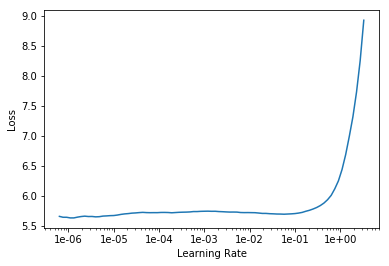

In [0]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

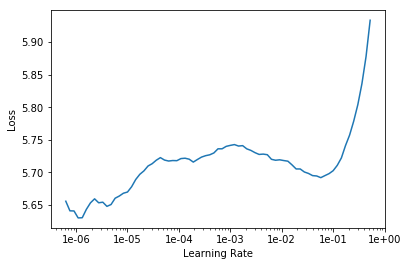

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit_one_cycle(2, 1e-2)
learn.save('bhai_AA_lm_head_wiki');
learn.freeze_to(-2)
learn.fit_one_cycle(2, 1e-2)
learn.freeze_to(-3)
learn.fit_one_cycle(2, 1e-2)
learn.unfreeze()
learn.fit_one_cycle(4, 1e-2)
learn.save('bhai_AA_lm_body_wiki')

epoch,train_loss,valid_loss,accuracy,time
0,5.270266,5.245830,0.254610,07:27
1,4.914285,5.087304,0.264056,07:26


epoch,train_loss,valid_loss,accuracy,time
0,5.068240,5.226252,0.257317,07:34
1,4.713046,5.034100,0.269995,07:34


epoch,train_loss,valid_loss,accuracy,time
0,5.037805,5.261441,0.257508,07:58
1,4.680634,5.035485,0.272907,08:00


epoch,train_loss,valid_loss,accuracy,time
0,4.912871,5.234925,0.257203,08:17
1,4.953098,5.199186,0.260961,08:17
2,4.684152,5.040317,0.270999,08:17
3,4.191275,5.007826,0.274803,08:17


In [0]:
learn.save_encoder('bhai_AA_lm_enc_wiki')

#### Classifier

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


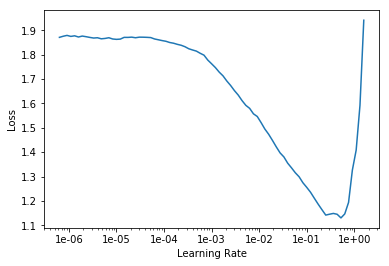

In [0]:
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)
learn_cls.load_encoder('bhai_AA_lm_enc_wiki')
learn_cls.freeze()
learn_cls.lr_find()
learn_cls.recorder.plot()

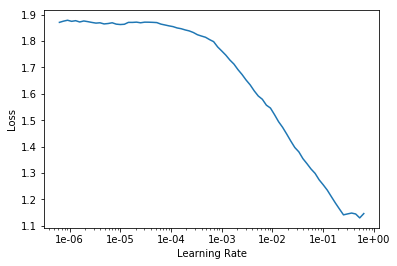

In [0]:
learn_cls.recorder.plot(skip_end=10)

In [0]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))
learn_cls.save('bhai_cls_wiki')
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
learn_cls.save('bhai_cls_wiki_2')
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2, slice(5e-3/(2.8**4),5e-3), moms=(0.8,0.7)) #rerun plez
learn_cls.save('bhai_cls_wiki_3')

epoch,train_loss,valid_loss,accuracy,time
0,0.752094,0.304642,0.911357,02:56
1,0.434900,0.193179,0.936288,03:05


epoch,train_loss,valid_loss,accuracy,time
0,0.280947,0.233843,0.927978,02:58
1,0.221623,0.161880,0.939058,02:57


epoch,train_loss,valid_loss,accuracy,time
0,0.152464,0.169746,0.950139,03:52
1,0.119005,0.167733,0.950139,04:01


In [0]:
learn_cls.unfreeze()
learn_cls.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn_cls.save('bhai_cls_wiki_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.059621,0.164789,0.947368,05:06
1,0.061343,0.144360,0.952909,04:56
2,0.051176,0.141039,0.958449,04:51
3,0.048833,0.136720,0.955679,04:39


#### Test

In [0]:
pred,targ = testing(aa/"ulm_test.csv")

300
Accuracy: 
0.9433333333333334
[('rg', 'mk'), ('rn', 'ij'), ('rn', 'mk'), ('rn', 'mk'), ('mk', 'rg'), ('rg', 'rn'), ('mk', 'rn'), ('rg', 'mk'), ('rg', 'ij'), ('hm', 'mk'), ('rg', 'mk'), ('fe', 'mk'), ('rg', 'mk'), ('rn', 'mk'), ('mk', 'fe'), ('rn', 'mk'), ('rg', 'rn')]


In [0]:
from sklearn.metrics import f1_score
out  = f1_score(targ, pred, average=None) #'macro' , also == weighted cuz dataset is balanced
out , out.mean()

(array([0.98    , 0.989899, 0.980392, 0.878505, 0.914894, 0.918367]),
 0.9436761306031639)

## Testing Classification in News corpus (pretrained on Wiki corpus)

### LM tuning

In [0]:
data_lm_AA = TextLMDataBunch.from_csv(news, 'full_doc_train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_lm_AA.save('news_data_lm_wiki.pkl')

In [0]:
data_lm_AA=load_data(news,'news_data_lm_wiki.pkl',bs=bs)

In [0]:
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.load(wiki/'models'/'wiki_word_lm_30');

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


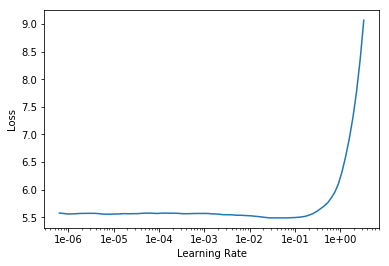

In [0]:
learn.lr_find()
learn.recorder.plot()

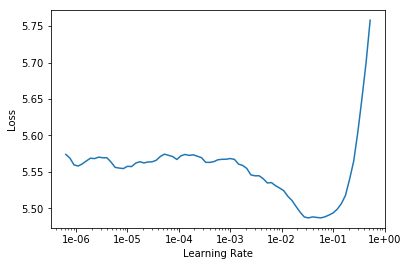

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.freeze()
learn.fit_one_cycle(1, 1e-2)
learn.save('news_wiki_lm_head');

epoch,train_loss,valid_loss,accuracy,time
0,4.410889,4.299798,0.320664,45:04


In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_wiki_lm_head_2');

epoch,train_loss,valid_loss,accuracy,time
0,4.413354,4.281544,0.322242,45:05


In [0]:
# learn.load('news_wiki_lm_head_2');
learn.freeze_to(-2) 
learn.fit_one_cycle(1, 1e-2)
learn.save('news_wiki_lm_body_1');

epoch,train_loss,valid_loss,accuracy,time
0,4.262488,4.125757,0.344763,45:52


In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_wiki_lm_body_2');

epoch,train_loss,valid_loss,accuracy,time
0,4.131681,4.095623,0.347484,45:55


In [0]:
learn.freeze_to(-3) 
learn.fit_one_cycle(1, 1e-2)
learn.save('news_wiki_lm_body_3');

epoch,train_loss,valid_loss,accuracy,time
0,4.144144,4.048460,0.353788,48:03


In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_wiki_lm_body_4');

epoch,train_loss,valid_loss,accuracy,time
0,4.091102,3.996618,0.358590,48:02


In [0]:
learn.load('news_wiki_lm_body_4');
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)
learn.save('news_wiki_lm_body_5');

epoch,train_loss,valid_loss,accuracy,time
0,3.846791,3.913681,0.366025,49:59


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('news_wiki_lm_body_6');

epoch,train_loss,valid_loss,accuracy,time
0,3.964772,3.873145,0.370056,50:12


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('news_wiki_lm_body_7');

epoch,train_loss,valid_loss,accuracy,time
0,3.701616,3.842607,0.373187,50:13


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('news_wiki_lm_body_8');

epoch,train_loss,valid_loss,accuracy,time
0,3.914714,3.818125,0.375746,50:14


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('news_wiki_lm_body_9');

epoch,train_loss,valid_loss,accuracy,time
0,3.807999,3.795679,0.377686,50:02


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('news_wiki_lm_body_10');

epoch,train_loss,valid_loss,accuracy,time
0,3.745599,3.777520,0.379648,50:13


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('news_wiki_lm_body_11');

epoch,train_loss,valid_loss,accuracy,time
0,3.792172,3.760823,0.381324,50:08


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('news_wiki_lm_body_12');

epoch,train_loss,valid_loss,accuracy,time
0,3.808039,3.744550,0.382912,50:11


In [0]:
learn.save_encoder('news_wiki_lm_enc')

### Classifier

In [0]:
# data_clas = TextClasDataBunch.from_csv(news, 'full_doc_train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
# data_clas.save('news_data_clas_wiki.pkl')

data_clas=load_data(news,'news_data_clas_wiki.pkl',bs=bs)

In [0]:
data_clas.show_batch()

text,target
"xxbos যেমন : গ্রেগর xxunk নামের এক xxunk এক সকালে ঘুম থেকে উঠে দেখে , সে একটা xxunk পরিণত xxunk xxunk ; কিন্তু xxunk তখনো xxunk অফিসে xxunk xxunk যেন আবার মিস না xxunk xxunk ( গল্প ‘ রূপান্তর ’ ) ; জোসেফ কে . নামের এক নিরপরাধ xxunk একদিন সকালে অজানা এক অপরাধের xxunk দুজন সরকারি এজেন্ট আকস্মিক গ্রেপ্তার করে বসে । কে . র প্রতিবেশী মহিলার ঘরে তার",art
xxbos ঢাকা থেকে জার্মানির রাজধানী বার্লিন xxunk যখন xxunk - উৎসব শুরু হতে তখনও তিন সপ্তাহ বাকি । বাংলাদেশের স্বল্পদৈর্ঘ্য চলচ্চিত্র উৎসব xxunk xxunk থাকার সুবাদে xxunk xxunk সম্প্রচার সংস্থা - xxunk xxunk আমন্ত্রণে এই সফর । xxunk xxunk xxunk এক দশক যাবত পৃথিবীর নানা প্রান্তের নানা দেশের চলচ্চিত্র উৎসব xxunk xxunk xxunk বছরের এই xxunk পাঁচ সপ্তাহব্যাপী এক কর্মশালার xxunk করে থাকে । এই xxunk মূল আকর্ষণ xxunk —,education
"xxbos xxunk আওতার মধ্যেকার মানুষের জীবনকে কেন্দ্র করে লেখা পাঠক xxunk স্পর্শ করে xxunk যত বই xxunk xxunk সেগুলোর মধ্যে xxunk মহৎ xxunk দ্যা xxunk অফ এ xxunk গার্ল xxunk ডাচ তরুণী অ্যানা ফ্রাঙ্কের পর্যবেক্ষণ হচ্ছে- “ xxunk xxunk xxunk xxunk হতে রেহাই xxunk xxunk না ” । xxunk রুজভেল্টের xxunk ১৯৪৭ সালে প্রকাশিত অ্যানা ফ্রাঙ্কের xxunk , xxunk ক্যাম্প এবং গ্যাস চেম্বারের হাত থেকে রেহাই xxunk xxunk ইহুদীদের জীবনে",art
xxbos বিশেষ অনুষ্ঠানমালা এটিএন বাংলা সকাল ৯ : ৪৫ প্রামাণ্য অনুষ্ঠান : xxunk ৭১ বিকাল ৫ : ৪২ তথ্য চিত্র : হেজাজের কাফেলা সন্ধ্যা ৬ : ৪৫ xxunk সন্ধ্যা ৬ : ৫৬ ইসলামী সঙ্গীত এনটিভি বিকেল ৪ : ১০ xxunk xxunk গান বিকেল ৫ : ৪০ আল কোরআনের আলো দেশ টিভি বিকাল ৪ : ৩০ রমজান স্পেশাল বিকাল ৫ : ০০ রমজানের,entertainment
xxbos বিশেষ অনুষ্ঠান এটিএন বাংলা সকাল ৯ : ৪৫ প্রামাণ্য অনুষ্ঠান : xxunk ৭১ বিকাল ৪ : ৩০ আলোচনা অনুষ্ঠান : সৌভাগ্যের পরশ বিকাল ৫ : ১০ ইসলামী কুইজ প্রতিযোগিতা : জানতে চাই বিকাল ৫ : ৪৫ তথ্যচিত্র : হেজাজের কাফেলা সন্ধ্যা ৬ : ১৫ ইসলামী xxunk ও xxunk ) একুশে সন্ধ্যা ৬ : ২০ xxunk হাট রাত ১১ : ৪৫ ঈদ বাজার দেশ টিভি বিকাল,entertainment


In [0]:
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)

In [0]:
learn_cls.load_encoder('news_wiki_lm_enc')

In [0]:
learn_cls.freeze()

In [0]:
learn_cls.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


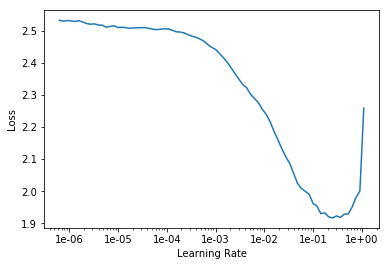

In [0]:
learn_cls.recorder.plot(skip_end=7)

In [0]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))
learn_cls.save('news_wiki_cls_1')

epoch,train_loss,valid_loss,accuracy,time
0,0.737572,0.625964,0.805396,35:53
1,0.695271,0.564263,0.826186,30:54


In [0]:
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
learn_cls.save('news_wiki_cls_2')

epoch,train_loss,valid_loss,accuracy,time
0,0.433933,0.314526,0.890381,36:49
1,0.333097,0.273856,0.898657,41:16


In [0]:
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn_cls.save('news_wiki_cls_3')

epoch,train_loss,valid_loss,accuracy,time
0,0.332301,0.272383,0.893704,52:18
1,0.264991,0.253984,0.900156,47:07


In [0]:
learn_cls.unfreeze()
learn_cls.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn_cls.save('news_wiki_cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.280914,0.253121,0.900743,1:15:59
1,0.269560,0.250213,0.900938,1:11:37
2,0.247795,0.246740,0.899896,1:08:59
3,0.233471,0.258900,0.900417,1:08:27


### Testing

In [0]:
pred,targ = testing(news/"full_doc_test.csv")

19137
Accuracy: 
0.9008204002717249
[('opinion', 'art'), ('opinion', 'politics'), ('opinion', 'accident'), ('opinion', 'sports'), ('opinion', 'education'), ('opinion', 'science_tech'), ('opinion', 'environment'), ('opinion', 'entertainment'), ('opinion', 'economics'), ('opinion', 'crime'), ('opinion', 'politics'), ('opinion', 'art'), ('opinion', 'entertainment'), ('opinion', 'sports'), ('opinion', 'politics'), ('opinion', 'economics'), ('opinion', 'sports'), ('opinion', 'art'), ('opinion', 'science_tech'), ('opinion', 'art'), ('opinion', 'entertainment'), ('opinion', 'science_tech'), ('opinion', 'science_tech'), ('opinion', 'sports'), ('opinion', 'international'), ('opinion', 'sports'), ('opinion', 'art'), ('opinion', 'politics'), ('opinion', 'entertainment'), ('opinion', 'environment'), ('opinion', 'art'), ('opinion', 'education'), ('opinion', 'education'), ('opinion', 'accident'), ('opinion', 'sports'), ('opinion', 'entertainment'), ('opinion', 'international'), ('opinion', 'art'), (

In [0]:
from sklearn.metrics import f1_score ##mistaken, please rerun
out  = f1_score(targ, pred, average='weighted') #'macro' , also == weighted cuz dataset is balanced
out , out.mean()

(0.9009797965067281, 0.9009797965067281)